# **House Price Prediction with Linear Regression and Random Forest**

The aim of this project is to predict real-estate prices using one basic machine learning algorithm, Linear Regression, and one advanced algorithm, Random Forest. Both will show different results for the accuracy.

# **Imports**

In [1]:
from bs4 import BeautifulSoup as bs4
from requests import get
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
%matplotlib inline
#from fake_useragent import UserAgent

# **Data preparation (Web scraping)**

Scraping data from the first website - 'FriendlyHousing'

In [2]:
url_1 = 'https://www.friendlyhousing.nl/nl/aanbod/kamer'
url_2 = 'https://www.friendlyhousing.nl/nl/aanbod/studio'
url_3 = 'https://www.friendlyhousing.nl/nl/aanbod/appartement'
urls= [url_1, url_2, url_3]

Scraping data from the second website - 'Pararius'

In [3]:
url_1p = 'https://www.pararius.com/apartments/eindhoven'
url_2p = 'https://www.pararius.com/apartments/eindhoven/page-2'
url_3p = 'https://www.pararius.com/apartments/eindhoven/page-3'
urls_p= [url_1p, url_2p, url_3p]


'FriendlyHousing'

In [4]:
#user_agent = UserAgent()
#headers={"user-agent": user_agent.chrome}
soup_array=[]
for url in urls:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array.append(soup)

'Pararius'

In [5]:
soup_array_p=[]
for url in urls_p:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array_p.append(soup)

'FriendlyHousing' - finding the elements from the html file

In [6]:
houses=[]
for s in soup_array:
    allHouses = s.find("ul", {"class": "list list-unstyled row equal-row"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "col-xs-12 col-sm-6 col-md-4 equal-col"}):
     # print(h)
      
      houses.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [7]:
catalog=[]
for h in houses:
  #data['houses'].append({
      type__= h.find('div', class_= 'specs').text
      t = type__.split()
      type_=t[0]
      street_ = h.find('h3').text
      s = street_.split()
      street = s[0]
      address = h.find('p').text
      a = address.split()
      postcode = a[0]
      #city = a[2]
      price = h.find('div', class_= 'price').text
      vars = type_,street, postcode, price
      catalog.append(vars)
      #print(city)

'Pararius' - finding the elements from the html file

In [8]:
houses_p=[]
for s in soup_array_p:
    allHouses = s.find("ul", {"class": "search-list"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "search-list__item search-list__item--listing"}):
     # print(h)
      
      houses_p.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [9]:
catalog_p=[]
for h in houses_p:
  #data['houses'].append({
        name = h.find('a',class_='listing-search-item__link listing-search-item__link--title').text
        _name = name.split()
        house_type = _name[0]
        street = _name[1]
        _address= h.findAll('div', class_='listing-search-item__location')[0].text
        #String manipulation to remove the unwanted signs from the address
        __address = _address.replace("\nnew\n ", "") 
        address = __address.replace("\n ", "")   #actual address after string manipulation - ready to be used in the exploring of the data
        new_address = address.split()
        postcode = new_address[0] 
        price_ = h.findAll('span', class_='listing-search-item__price')[0].text
        #splitting the string to find the price
        p=price_.split()
        _price = p[0] #actual price before string manipulation
        __price = _price.replace("€", "")  #actual price before full string manipulation
        price = __price.replace(",", "")   #actual price after string manipulation - ready to be used in the exploring of the data

        #finding the whole element from the web page
        ylr= h.findAll('section', class_= 'illustrated-features illustrated-features--vertical')[0].text 

        #splitting the string to find the living are, rooms and year
        lry= ylr.split()

        #living_area after taking the indexes that define it
        living_area = lry[0] 

        #rooms after taking the index that defines the variable
        rooms = lry[4] 
    
        vars = house_type, street, postcode,price,living_area,rooms
        catalog_p.append(vars)
    
print(catalog_p)


[('House', 'Nieuwe', '5612', '1150', '65', '3'), ('Apartment', 'Kruisstraat', '5612', '950', '40', '2'), ('Apartment', 'Bleekstraat', '5611', '1175', '52', '2'), ('Apartment', 'Hertog', '5611', '650', '28', '2'), ('Apartment', 'Leenderweg', '5643', '775', '25', '1'), ('Apartment', 'Emmasingel', '5611', '2500', '135', '3'), ('Apartment', 'Winkelcentrum', '5625', '1750', '110', '3'), ('Apartment', 'De', '5611', '1353', '91', '3'), ('Apartment', 'De', '5611', '1318', '91', '3'), ('House', 'Bolestein', '5653', '1550', '147', '5'), ('House', 'Nabucco', '5629', '1300', '100', '4'), ('Apartment', 'Jan', '5611', '1485', '90', '2'), ('Apartment', 'Jan', '5611', '1350', '90', '3'), ('Apartment', 'Gestelsestraat', '5615', '1250', '61', '2'), ('Apartment', 'Maalakker', '5625', '1245', '75', '3'), ('Apartment', 'Borchmolen', '5612', '1450', '100', '3'), ('Apartment', 'Pastoor', '5612', '1150', '75', '3'), ('Apartment', 'Schootsestraat', '5616', '850', '45', '2'), ('Apartment', 'Pastoor', '5622', '6

'FriendlyHousing' - creating the dataframe

In [10]:
dataframe = pd.DataFrame(catalog)
dataframe.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE'] 
dataframe 

,TYPE,STREET NAME,POSTCODE,PRICE
0,Kamer,Willem,5611,320
1,Kamer,Willem,5611,310
2,Kamer,Willem,5611,325
3,Kamer,Jacob,5622,335
4,Kamer,Edelweisstraat,5643,265
...,...,...,...,...
118,Appartement,Frankrijkstraat,5622,925
119,Appartement,Kerkakkerstraat,5616,950
120,Appartement,Leenderweg,5614,800
121,Appartement,Leostraat,5615,775


'Pararius'- creating the dataframe

In [11]:
df_ = pd.DataFrame(catalog_p)
df_.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE','LIVING_AREA', 'ROOMS'] 
df_ 

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,House,Nieuwe,5612,1150,65,3
1,Apartment,Kruisstraat,5612,950,40,2
2,Apartment,Bleekstraat,5611,1175,52,2
3,Apartment,Hertog,5611,650,28,2
4,Apartment,Leenderweg,5643,775,25,1
...,...,...,...,...,...,...
91,House,Scheidingstraat,5654,2500,100,3
92,Apartment,Kromakkerweg,5616,1195,55,2
93,Apartment,Brugmanstraat,5621,1070,65,2
94,Apartment,Hooghuisstraat,5611,925,38,2


# **Data integration**



> Using concat to create a `Union` between the two datasets and then, integrate them into one dataset.



In [81]:
frames = [dataframe, df_]

In [82]:
df = pd.concat(frames)
df

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Willem,5611,325,NaN,NaN
3,Kamer,Jacob,5622,335,NaN,NaN
4,Kamer,Edelweisstraat,5643,265,NaN,NaN
...,...,...,...,...,...,...
91,House,Scheidingstraat,5654,2500,100,3
92,Apartment,Kromakkerweg,5616,1195,55,2
93,Apartment,Brugmanstraat,5621,1070,65,2
94,Apartment,Hooghuisstraat,5611,925,38,2


# **Data analysis**



Checking the dimension of the dataset and the features.





In [14]:
# Check the dimension of the dataset
df.shape

(219, 6)

>The dataset has 219 observations and 6 features, but the observations(rows) will change with time because the data is scraped and this means it is up to date. Whenever there is a change on the websites, there is a change in the dataset.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 95
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPE         219 non-null    object
 1   STREET NAME  219 non-null    object
 2   POSTCODE     219 non-null    object
 3   PRICE        219 non-null    object
 4   LIVING_AREA  96 non-null     object
 5   ROOMS        96 non-null     object
dtypes: object(6)
memory usage: 12.0+ KB


>It can be seen that none features are numeric, but objects. Later, they will have to be converted into either float or int in order to be plotted and then used for the trainig of the models. There are also missing values in the dataset.

There are missing values in the dataset, which appeared after the data integration of the two datasets. This will be fixed later before the training of the models.

In [24]:
df.isnull().sum()

TYPE             0
STREET NAME      0
POSTCODE         0
PRICE            0
LIVING_AREA    123
ROOMS          123
dtype: int64

In [83]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0].style.background_gradient(cmap='Reds')
miss_val

,MissvalCount,Percent
ROOMS,123,56.16
LIVING_AREA,123,56.16


>The light red color shows the small amount of NaN values. If the features were with a high percent of missing values, they would have to be removed. Yet, in this case, they have relatively low percentage so they can be used in future. Then, the NaN values will be replaced.

In [16]:
#Description of the dataset
df.describe()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
count,219,219,219,219,96,96
unique,6,109,27,122,55,6
top,Apartment,Philitelaan,5611,415,35,3
freq,73,12,38,15,5,32


In [17]:
#First 5 rows of our dataset
df.head()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Willem,5611,325,NaN,NaN
3,Kamer,Jacob,5622,335,NaN,NaN
4,Kamer,Edelweisstraat,5643,265,NaN,NaN


In [18]:
#Last 5 rows of our dataset
df.tail()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
91,House,Scheidingstraat,5654,2500,100,3
92,Apartment,Kromakkerweg,5616,1195,55,2
93,Apartment,Brugmanstraat,5621,1070,65,2
94,Apartment,Hooghuisstraat,5611,925,38,2
95,Apartment,Hooghuisstraat,5611,725,22,1


In [19]:
df['TYPE'].value_counts()

Apartment      73
Kamer          49
Appartement    38
Studio         36
House          19
Room            4
Name: TYPE, dtype: int64

In [20]:
df.iloc[0]

TYPE            Kamer
STREET NAME    Willem
POSTCODE         5611
PRICE             320
LIVING_AREA       NaN
ROOMS             NaN
Name: 0, dtype: object

In [21]:
df.groupby('POSTCODE').count()

,TYPE,STREET NAME,PRICE,LIVING_AREA,ROOMS
POSTCODE,,,,,
5503,1,1,1,0,0
5611,38,38,38,21,21
5612,29,29,29,13,13
5613,9,9,9,4,4
5614,13,13,13,2,2
5615,11,11,11,4,4
5616,11,11,11,7,7
5617,12,12,12,12,12
5621,9,9,9,2,2


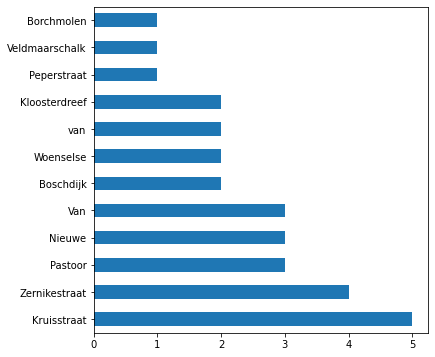

In [22]:
df[(df['POSTCODE'] == '5612')]['STREET NAME'].value_counts().plot(kind='barh', figsize=(6, 6))

Sorting the data by `Type`.

In [23]:
df.sort_values('TYPE', ascending = True)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
95,Apartment,Hooghuisstraat,5611,725,22,1
21,Apartment,Cornelis,5654,720,25,1
22,Apartment,Philitelaan,5617,1900,135,5
26,Apartment,Lichtstraat,5611,1308,103,3
27,Apartment,Lichtstraat,5611,1278,105,3
...,...,...,...,...,...,...
64,Studio,Dr.,5623,470,NaN,NaN
65,Studio,Heistraat,5614,550,NaN,NaN
66,Studio,Kloosterdreef,5612,660,NaN,NaN
51,Studio,Van,5612,592,NaN,NaN



**Pre Processing**

Handling Outlier

> An **outlier** is a data point in a data set that is distant from all other observations (a data point that lies outside the overall distribution of the dataset.)

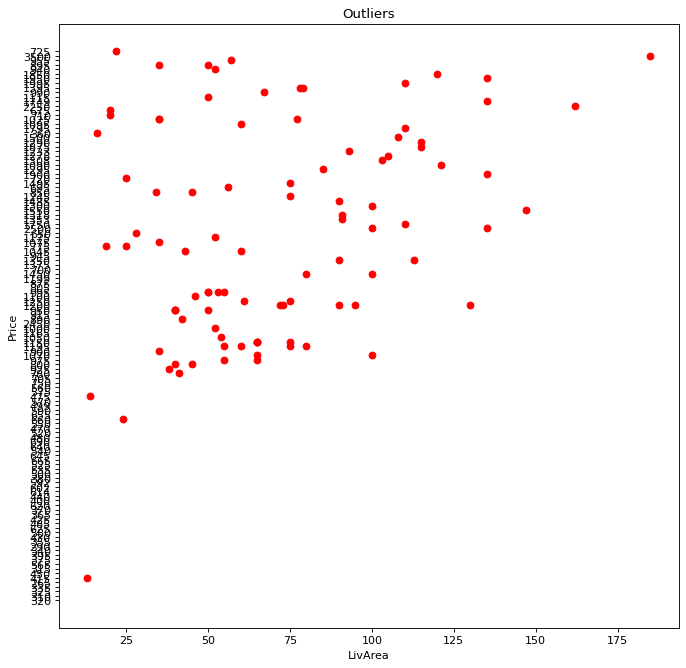

In [26]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(df.LIVING_AREA, df.PRICE, c= 'red')
plt.title("Outliers")
plt.xlabel("LivArea")
plt.ylabel("Price")
plt.show()

In [87]:
df['PRICE'] =df['PRICE'].astype(float)
df['POSTCODE'] =df['POSTCODE'].astype(int)
df['LIVING_AREA'] =df['LIVING_AREA'].astype(float)
df['ROOMS'] =df['ROOMS'].astype(float)
code_numeric = {'Kamer': 5,'Apartment': 1, 'Appartement': 1, 'Room': 2, 'Studio': 4, 'House': 3}
df ['TYPE'] = df['TYPE'].map(code_numeric)
df['TYPE'] =df['TYPE'].astype(float)

In [27]:
df['PRICE'] =df['PRICE'].astype(float)

<function matplotlib.pyplot.show>

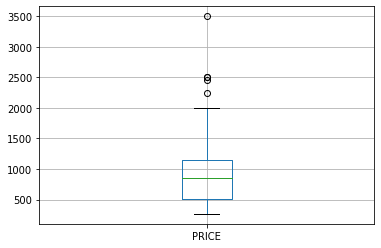

In [28]:
df.boxplot(column=['PRICE'])
plt.show

In [91]:
#Check the mean values
df['LIVING_AREA'].mean()

70.33333333333333

In [92]:
#Check the median 
df['LIVING_AREA'].median()

65.0

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PRICE    640.0
dtype: float64


In [ ]:
print(df['PRICE'].skew())
df['PRICE'].describe()

1.6498014956603508


count     217.000000
mean      872.391705
std       453.371514
min       265.000000
25%       500.000000
50%       850.000000
75%      1100.000000
max      3500.000000
Name: PRICE, dtype: float64

In [ ]:
print(df['PRICE'].quantile(0.10))
print(df['PRICE'].quantile(0.90))

415.0
1350.0


<function seaborn.utils.despine>

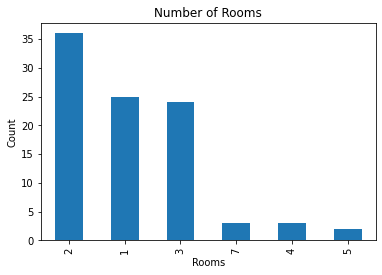

In [ ]:
df['ROOMS'].value_counts().plot(kind='bar')
plt.title('Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

In [ ]:
print(df['PRICE'])

0      320.0
1      310.0
2      325.0
3      580.0
4      335.0
       ...  
88    1000.0
89     675.0
90    1245.0
91    1175.0
92    1050.0
Name: PRICE, Length: 219, dtype: float64


We will analyze the features in their descending of correlation with sales price

Examining the data distributions of the features. We will start with the target variable, `PRICE`, to make sure it's normally distributed.

This is important because most machine learning algorithms make the assumption that the data is normal distributed. When data fits a normal distribution, statements about the price using analytical techniques will be made.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


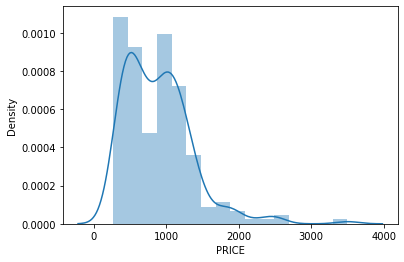

In [30]:
sns.distplot(df['PRICE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


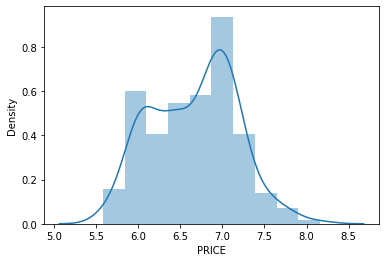

In [31]:
# Transform the target variable 
sns.distplot(np.log(df.PRICE))



> We can see that the `PRICE` distribution is not skewed after the transformation, but normally distributed.
>The transformed data will be used in in the dataframe and remove the skewed distribution:


> **Normally distributed** means that the data is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 







In [32]:
df['LogOfPrice'] = np.log(df.PRICE)
df.drop(["PRICE"], axis=1, inplace=True)

Reviewing the skewness of each feature

In [33]:
df.skew().sort_values(ascending=False)

ROOMS          0.968659
LIVING_AREA    0.689641
LogOfPrice     0.027232
POSTCODE      -0.853754
dtype: float64



>Values closer to zero are less skewed. The results show some features having a positive (right-tailed) or negative (left-tailed) skew.





Factor plot is informative when we have multiple groups to compare. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

6.028279    15
7.090077     6
6.856462     6
7.047517     6
6.109248     5
            ..
6.214608     1
7.153052     1
5.899897     1
6.484635     1
7.210080     1
Name: LogOfPrice, Length: 122, dtype: int64

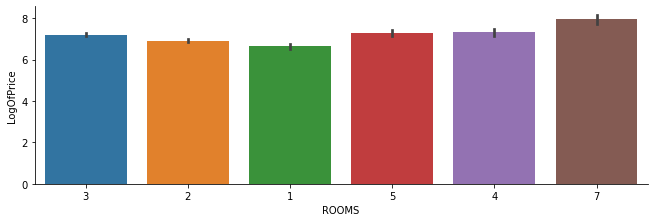

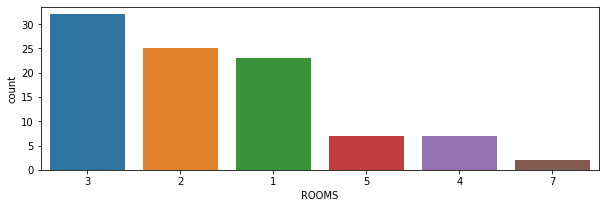

In [35]:
sns.factorplot('ROOMS', 'LogOfPrice', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('ROOMS', data=df)
df['LogOfPrice'].value_counts()

> Real estate with 5 rooms has the  highest `Price` while the sales of others with rooms of 2 is the most sold ones.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


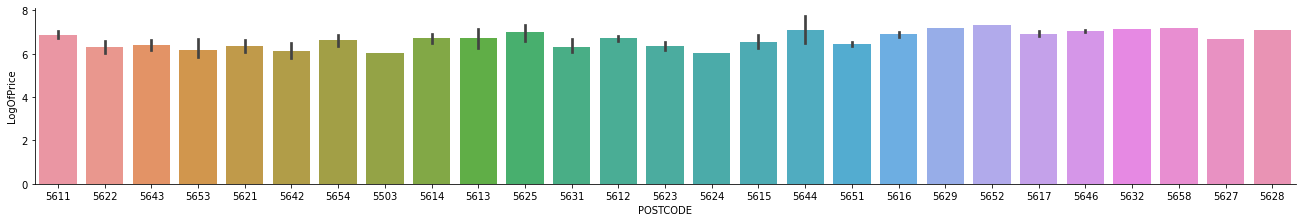

In [36]:
#g = sns.factorplot(x='POSTCODE', y='Skewed_SP', col='PRICE', data=df, kind='bar', col_wrap=4, aspect=0.8)
sns.factorplot('POSTCODE', 'LogOfPrice', data=df,kind='bar',size=3,aspect=6)


>The diagram represents the `price` of a rpoperty, depending on its `postcode`.




# **Train-Test Split dataset**


> Necessary imports

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 95
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         219 non-null    float64
 1   STREET NAME  219 non-null    object 
 2   POSTCODE     219 non-null    int64  
 3   PRICE        219 non-null    float64
 4   LIVING_AREA  96 non-null     float64
 5   ROOMS        96 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.0+ KB


In [50]:
df.isnull().sum()

TYPE             0
STREET NAME      0
POSTCODE         0
PRICE            0
LIVING_AREA    123
ROOMS          123
dtype: int64

Analyzing the numeric features.


In [51]:
numeric_features = df.select_dtypes(include=[np.number])

In [55]:
numeric_features.columns

Index(['TYPE', 'POSTCODE', 'PRICE', 'LIVING_AREA', 'ROOMS'], dtype='object')

Filling up the null values in order to train the model. 

In [58]:
df.fillna(0)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,5.0,Willem,5611,320.0,0.0,0.0
1,5.0,Willem,5611,310.0,0.0,0.0
2,5.0,Willem,5611,325.0,0.0,0.0
3,5.0,Jacob,5622,335.0,0.0,0.0
4,5.0,Edelweisstraat,5643,265.0,0.0,0.0
...,...,...,...,...,...,...
91,3.0,Scheidingstraat,5654,2500.0,100.0,3.0
92,1.0,Kromakkerweg,5616,1195.0,55.0,2.0
93,1.0,Brugmanstraat,5621,1070.0,65.0,2.0
94,1.0,Hooghuisstraat,5611,925.0,38.0,2.0


In [59]:
df.dropna(inplace=True)

In [62]:
# set the target and predictors
y = df.PRICE  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["PRICE"],axis=1)  # predictors

To split the dataset, I will use random sampling with 80/20 train-test split; that is, 80% of the dataset will be used for training and set aside 20% for testing:

In [66]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [67]:
df.isnull()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
91,False,False,False,False,False,False
92,False,False,False,False,False,False
93,False,False,False,False,False,False
94,False,False,False,False,False,False


# **Modelling**


Two models will be built and evaluated by their performances with R-squared metric. Additionally, insights on the features that are strong predictors of house prices, will be analised .

**Linear Regression**



In [68]:
lr = LinearRegression()
# fit optimal linear regression line on training data
lr.fit((X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#predict y_values using X_test set
yr_hat = lr.predict(X_test)

In [70]:
lr_score =lr.score((X_test),y_test)
print("Accuracy: ", lr_score)

Accuracy:  0.594355402441709


In [77]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, yr_hat))

RMSE is: 
 44601.32425257638


Text(0.5, 1.0, 'Linear Regression Model')

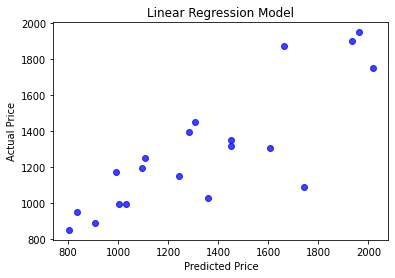

In [79]:
actual_values = y_test
plt.scatter(yr_hat, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

Using cross-validation to see whether the model is over-fitting the data.

In [71]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.68906483 0.02848488 0.87908458 0.88546289 0.57999201]
R2:  0.6124178376920201


>It doesn't appear that for this train-test dataset the model is  over-fitting the data (the cross-validation performance is very close in value). 

**Random Forest**

In [72]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.4790773233776674


The performance of Random forest is slightly better than the Linear regression. The model parameters can be optimised for better performance using gridsearch.

In [73]:
#Random forest determined feature importances
rfr.feature_importances_

array([0.02849527, 0.0711885 , 0.79509618, 0.10522005])

# **Plotting the Feature Importance**

Finding the features that are the most promissing predictors:

In [74]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)

#list(feature_importances)
sorted_feature_importances = sorted(feature_importances, reverse = True)

#print(sorted_feature_importances)
top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['LIVING_AREA', 'ROOMS', 'POSTCODE', 'TYPE']


**Plotting the feauture importance of the Random forest.**

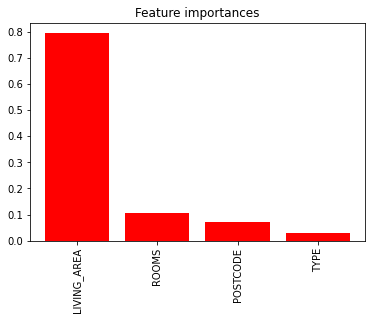

In [75]:
plt.figure()
plt.title( "Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

The idea behind the plotting of feauture importance is that after evaluating the performance of the model, the values of a feature of interest must be permuted and reevaluate model performance.
The feature importance (variable importance) describes which features are relevant. 

# **Conclusion**
**Data collection:**

For the data collection part, I decided to use `web scraping` as e technique because it gives the opportunity to work with a data set that is up to date and therefore, makes more accurate summaries.

**Data preprocessing:**

I tried different types of data transforms to expose the data structure better, so we may be able to improve model accuracy later.

*   `Standardizing` was made to the data set so as to reduce the effects of differing distributions.
*   `The skewness` of the features was checked in order to see how distorted a data sample is from the normal distribution.
* `Rescaling (normalizing)` the dataset was also included to reduce the effects of differing scales

**Modelling:**

I used two models to determine the accuracy - Linear Regression and Random Forest.

Linear Regression turns out to be the more accurate model for predicting the house price. It scored an estimated accuracy of 68%, out performing the Random Forest - 66%. Random Forest determined that overall the living area of a home is by far the most important predictor. Following are the sizes of above rooms and postcode.


